## Blatt 08

### Aufgabe 24: _F-Praktikum_


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties import unumpy as unp
np.random.seed(8)

In [2]:
psi = np.linspace(0, 11, 12) * 30 * np.pi / 180
asy = np.array([-0.032,0.010,0.057,0.068,0.076,0.080,
                0.031,0.005,-0.041,-0.090,-0.088,-0.074])

In [3]:
def f_1(psi):
    return np.cos(psi)

def f_2(psi):
    return np.sin(psi)

#### a.)

Bestimmen der Designmatrix $\mathbf{A}$.

In [4]:
A = np.array([f_1(psi), f_2(psi)]).T

print(f'Designmatrix A = \n{np.round(A, 4)}.')

Designmatrix A = 
[[ 1.     0.   ]
 [ 0.866  0.5  ]
 [ 0.5    0.866]
 [ 0.     1.   ]
 [-0.5    0.866]
 [-0.866  0.5  ]
 [-1.     0.   ]
 [-0.866 -0.5  ]
 [-0.5   -0.866]
 [-0.    -1.   ]
 [ 0.5   -0.866]
 [ 0.866 -0.5  ]].


---
#### b.)

Berechnen des Lösungsvektors $\mathbf{\hat{a}}$, mit der Methode der kleinsten Quadrate.

In [5]:
a_hut = np.linalg.inv(A.T @ A) @ A.T @ asy
print(f'Der Lösungsvektor ist: {a_hut}.')

Der Lösungsvektor ist: [-0.0375063   0.07739978].


---
#### c.)

Berechnen der Kovarianzmatrix $\mathbf{V}[\mathbf{\hat{a}}]$ und den Fehlern von $a_1$ und $a_2$ und Korrelationskoeffizienten.
Die Messdaten der Asymmetrie haben einen Messfehler von $\pm 0,011$.

In [6]:
fehler = 0.011
a_1_value = a_hut[0]
a_2_value = a_hut[1]
V_y = fehler **2 * np.identity(12)

In [7]:
V_a = np.linalg.inv(A.T @ A) @ A.T @ V_y @ A @ np.linalg.inv(A.T @ A)

print(f'Die Kovarianzmatrix V[a_hut] ist: \n{V_a}.')

Die Kovarianzmatrix V[a_hut] ist: 
[[ 2.01666667e-05 -1.60179413e-21]
 [-1.60179413e-21  2.01666667e-05]].


Die Elemente der Nebendiagonalen sind quasi Null. Deshalb sind cie Fehler von $a_1$ und $a_2$ die Wurzeln der Hauptdiagonalelemente.

In [8]:
err_a1 = np.sqrt(np.diag(V_a)[0])
err_a2 = np.sqrt(np.diag(V_a)[1])

a_1 = ufloat(a_1_value, err_a1)
a_2 = ufloat(a_2_value, err_a2)

print(f'a_1: {a_1}\na_2: {a_2}')

a_1: -0.038+/-0.004
a_2: 0.077+/-0.004


In [9]:
rho_a = V_a[0,1] / (V_a[0,0] * V_a[1,1])

print(f'Der Korrelationskoeffizient von a_1 und a_2 ist: {rho_a:.3}, also quasi 0.')

Der Korrelationskoeffizient von a_1 und a_2 ist: -3.94e-12, also quasi 0.


---
#### d.)

Berechnen von $A_0$ und $\delta$, sowie deren Fehler und Korrelationen aus $a_1$ und $a_2$.

$$f(\psi) = A_0\cos{(\psi+\delta)} = \underbrace{A_0\cos{(\delta)}}_{a_1}\cos{(\psi)}+\underbrace{(-A_0\sin{(\delta))}}_{a_2}\sin{(\psi)}
$$

$$\begin{aligned}
\delta &= \arctan{\left(-\frac{a_2}{a_1}\right)}\\
A_0 &= \frac{a_1}{\cos{(\delta)}} = -\frac{a_2}{\sin{(\delta)}} = -\sqrt{a_1^2 + a_2^2}
\end{aligned}$$

In [10]:
delta = unp.arctan(-a_2 / a_1) 
A_0 = a_1 / unp.cos(delta)

print(f'A_0 = {A_0},\ndelta = {delta}')

A_0 = -0.086+/-0.004,
delta = 1.12+/-0.05


Für die Berechnung der Korrelation zwischen $A_0$ und $\delta$ wird die Formel $\mathrm{JVJ^T}$ für die Transformation mehrerer Variablen verwendet. Dabei ist $\mathrm{J}$
die Jacobimatrix. Die Elemente auf der Nebendiagonale der Korelationsmatrix $\mathrm{V}$ sind quasi Null, wie oben gezeigt wurde. Für die folgende Rechnung wird jedoch mit den exakten Werten gerechnet. 

$$
\begin{aligned}
\mathrm{J} &= 
\begin{pmatrix}
    \frac{a_1}{\sqrt{a_1^2 + a_2^2}} & \frac{a_2}{\sqrt{a_1^2 + a_2^2}} \\
    \frac{a_2}{a_1^2 + a_2^2} & \frac{-a_1}{a_1^2 + a_2^2} \\
\end{pmatrix}\\
\\
\mathrm{V} &\approx
\begin{pmatrix}
    \sigma_{a_1}^2 & 0 \\
    0 & \sigma_{a_2}^2 \\
\end{pmatrix}\\
\\
\mathrm{JVJ^T} &= \frac{1}{a_1^2 + a_2^2}
\begin{pmatrix}
    a_1^2\sigma_{a_1}^2 + a_2^2 \sigma_{a_2}^2 & \frac{a_1a_2}{\sqrt{a_1^2 + a_2^2}}\left(\sigma_{a_1}^2 - \sigma_{a_2}^2\right) \\
    \frac{a_1a_2}{\sqrt{a_1^2 + a_2^2}}\left(\sigma_{a_1}^2 - \sigma_{a_2}^2\right) & a_2^2\sigma_{a_1}^2 + a_1^2 \sigma_{a_2}^2 \\
\end{pmatrix}\\
\end{aligned}
$$

In [11]:
J = np.array([[a_1.n/(a_1.n**2 + a_2.n**2)**(1/2), a_2.n/(a_1.n**2 + a_2.n**2)**(1/2)],
             [a_2.n/(a_1.n**2 + a_2.n**2), -a_1.n/(a_1.n**2 + a_2.n**2)]])

V_A_0_delta = J@V_a@J.T

print(f'Kovarianzmatrix = {V_A_0_delta}')

Kovarianzmatrix = [[ 2.01666667e-05 -8.13151629e-20]
 [-5.42101086e-20  2.72616550e-03]]


In [12]:
cov_A_0_delta = V_A_0_delta[0, 1]

rho_A_0_delta = cov_A_0_delta / (V_A_0_delta[0,0] * V_A_0_delta[1,1])

print(f'V[A_0, delta] =\n {V_A_0_delta}\n\nKorrelationskoeffizient = {rho_A_0_delta}')

V[A_0, delta] =
 [[ 2.01666667e-05 -8.13151629e-20]
 [-5.42101086e-20  2.72616550e-03]]

Korrelationskoeffizient = -1.4790579785777088e-12


Die Kovarianzmatrix ist aufgrund von numerischen Rauschens nicht symmetrisch.

---
## Aufgabe 22

$$y = a_0 + a_1 x,$$

mit $a_0 = 1,0\pm0,2$ und $a_1 = 1,0\pm0,2$.
Die Größen sind miteinander korreliert, wobei $\rho = -0,8$ ist.


#### a.)

$$ \sigma_{y}={\sqrt {\sum _{i=1}^{m}\left({\frac {\partial y}{\partial x_{i}}}\cdot \sigma_{i}\right)^{2}+2\underbrace {\sum _{i=1}^{m-1}\sum _{k=i+1}^{m}\left({\frac {\partial y}{\partial x_{i}}}\right)\left({\frac {\partial y}{\partial x_{k}}}\right)\cdot \text{cov}(x_{i},x_{k})} _{\mathrm {Korrelationsterme} }}}$$

Korrelierte Variablen:

Benutze $\rho = \frac{\text{cov}(a_0, a_1)}{\sigma_{a_0}\sigma_{a_1}}$, um damit $\text{cov}(a_0, a_1)$ auszudrücken.

$$\sigma_y(x) = \sqrt{\sigma_{a_0}^2 + (\sigma_{a_1}x)^2 + 2x\rho\sigma_{a_0}\sigma_{a_1}}$$

Unkorrelierte Variablen:

$$\sigma_y(x) = \sqrt{\sigma_{a_0}^2 + (\sigma_{a_1}x)^2}$$

---
#### b.)

Numerisches Bestimmen der Korrelation.

In [13]:
def y(a_0, a_1, x):
    return a_0 + a_1 * x

a_0 = 1
a_1 = 1

rho = -0.8
sigma_a0 = 0.2
sigma_a1 = 0.2

cov_a0_a1 = rho * sigma_a0 * sigma_a1
cov = np.array([[sigma_a0**2, cov_a0_a1], [cov_a0_a1, sigma_a1**2]])

#  Monte Carlo simulierte normalverteilte Zahlen für die korrelierten Parameter a0 und a1 

a = np.random.multivariate_normal(np.array([a_0, a_1]), cov, 10000)

#  Monte Carlo simulierte normalverteilte Zahlen für unkorrelierten Parameter a0 und a1 

a_unkorreliert = np.random.multivariate_normal(np.array([a_0, a_1]), np.array([[sigma_a0**2, 0], [0, sigma_a1**2]]), 10000)

Plotten der Ergebnisse.

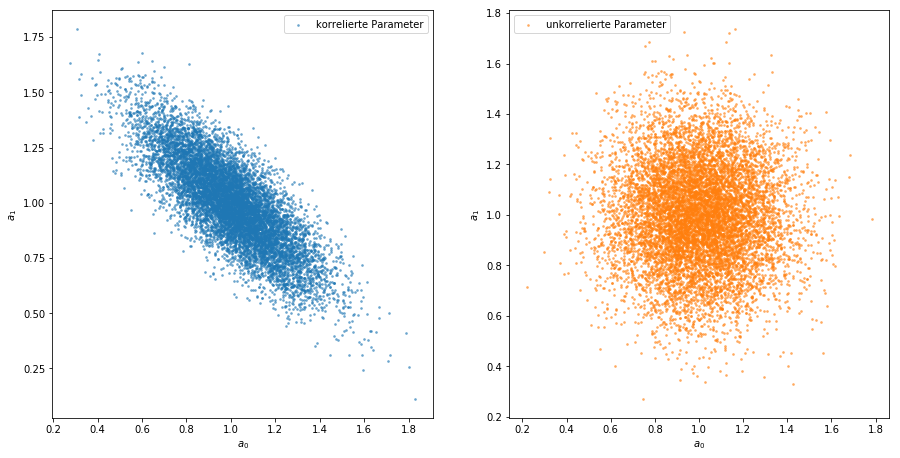

In [14]:
plt.figure(figsize=[15,7.5])
plt.subplot(1,2,1)
plt.scatter(a[:,0], a[:,1], alpha=0.5, s=3, label='korrelierte Parameter', color='C0')
plt.xlabel(r'$a_0$')
plt.ylabel(r'$a_1$')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(a_unkorreliert[:,0], a_unkorreliert[:,1], alpha=0.5, s=3, label='unkorrelierte Parameter', color='C1')
plt.xlabel(r'$a_0$')
plt.ylabel(r'$a_1$')
plt.legend()
plt.show()

---
#### c.)

Bestimmen der Vorhersage für feste $x = -3, 0, 3$.

Zuerst die analytische Berechnung von $\sigma_y$:

In [15]:
x = np.array([-3, 0, 3])

In [16]:
def sigma_y_korr(sigma_a0, sigma_a1, rho, x):
    return np.sqrt(sigma_a0**2 + (sigma_a1 * x)**2 + 2 * sigma_a0 * sigma_a1 * rho * x)

def sigma_y_unkorr(sigma_a0, sigma_a1, x):
    return np.sqrt(sigma_a0**2 + (sigma_a1 * x)**2)

In [17]:
print('-'*50, '\n\nFür korrelierte Parameter:\n')
for i in x:
    sigma_y = sigma_y_korr(sigma_a0, sigma_a1, rho, i)
    print(f'Fehler von y für x = {i} : {sigma_y}')

-------------------------------------------------- 

Für korrelierte Parameter:

Fehler von y für x = -3 : 0.7694153624668539
Fehler von y für x = 0 : 0.2
Fehler von y für x = 3 : 0.4560701700396553


---

In [18]:
print('-'*50, '\n\nFür unkorrelierte Parameter:\n')
for i in x:
    sigma_y = sigma_y_unkorr(sigma_a0, sigma_a1, i)
    print(f'Fehler von y für x = {i} : {sigma_y}')

-------------------------------------------------- 

Für unkorrelierte Parameter:

Fehler von y für x = -3 : 0.632455532033676
Fehler von y für x = 0 : 0.2
Fehler von y für x = 3 : 0.632455532033676


---
Nun die numerische Berechnung von $\sigma_y$

In [19]:
print('-'*50, '\n\nFür korrelierte Parameter:\n')
for i in x:
    y_korr = y(a[:,0], a[:,1], i)
    sigma_y = np.std(y_korr)
    print(f'Fehler von y für x = {i} : {sigma_y}')

-------------------------------------------------- 

Für korrelierte Parameter:

Fehler von y für x = -3 : 0.7730985720856134
Fehler von y für x = 0 : 0.20010700274729729
Fehler von y für x = 3 : 0.45975351542563675


In [20]:
print('-'*50, '\n\nFür unkorrelierte Parameter:\n')
for i in x:
    y_unkorr = y(a_unkorreliert[:,0], a_unkorreliert[:,1], i)
    sigma_y = np.std(y_unkorr)
    print(f'Fehler von y für x = {i} : {sigma_y}')

-------------------------------------------------- 

Für unkorrelierte Parameter:

Fehler von y für x = -3 : 0.6354125459798861
Fehler von y für x = 0 : 0.20062457955260288
Fehler von y für x = 3 : 0.6281967235720122


__Vergleich :__ 
Die analytischen Werte wurden mit den numerisch berechneten bis auf die dritte Nachkommastelle approximiert.
Allgemein gilt, je mehr Werte aus der Monte Carlo Simulation entnommen werden, desto näher stimmen die numerischen mit den analytisch erechneten Werten überein.

---
## Aufgabe 23 Teilchenspuren

In einem Teilchenphysikexperiment stehen 2 Ebenen von Driftkammern senkrecht zur
z-Achse an den Positionen z 1 und z 2 (kein Magnetfeld, Vakuum). Sie messen die jeweilige
x-Position ($x_1$ und $x_2$ ) eines hindurchfliegenden geladenen Teilchens mit den Fehlern $\sigma_{x1}$
und $\sigma_{x2}$ ohne Korrelation.

#### a.)
Es werden die $x$-Positionen berechnet, mit den Fehlern $\sigma_{x_1}$ und $\sigma_{x_2}$.

$$x = az + b,$$

für $z = z_1$ ist $x = x_1$ und für $z = z_2$ ist $x = x_2$.

$$
\begin{aligned}
\Rightarrow b &= x_1 - az_1\\
\Rightarrow a &= \frac{x_2 - x_1}{z_2 - z_1}\\
\Rightarrow b &= x_1 - \frac{x_2 - x_1}{z_2 - z_1}\cdot z_1\\
x(z) &= \frac{x_2 - x_1}{z_2 - z_1}(z - z_1)  + x_1
\end{aligned}$$

Da die Messfehler in $x$ unkorreliert sind ergibt sich die Kovarianzmatrix der Messdaten zu:

$$\mathrm{V}[\vec{x}] = 
\begin{pmatrix}
    \sigma_{x1}^2 & 0 \\
    0 & \sigma_{x2}^2 \\
\end{pmatrix}
$$

Die Kovarianzmatrix von $a$ und $b$ wird wie folgt berechnet:

$$\mathrm{V}[\hat{x}] =(A^TA)^{-1}A^TV[\vec{x}]A(A^TA)^{-1}$$

Mit den einzelnen Größen:

$$A =
\begin{pmatrix}
    1 & z_1 \\
    1 & z_2 \\
\end{pmatrix}
$$

$$A^T =
\begin{pmatrix}
    1 & 1 \\
    z_1 & z_2 \\
\end{pmatrix}
$$

$$(A^TA)^{-1} = \frac{1}{(z_1 - z_2)^2}
\begin{pmatrix}
    z_1^2 + z_2^2 & -z_1 - z_2 \\
    -z_1 - z_2 & 2 \\
\end{pmatrix}
$$

$$\mathrm{V}[\hat{x}] = \frac{1}{(z_1 - z_2)^2}
\begin{pmatrix}
    (\sigma_{x_2}^2z_1^2 + \sigma_{x_1}^2z_2^2) & -\sigma_{x_1}^2z_2 - \sigma_{x_2}^2z_1 \\
    -\sigma_{x_1}^2z_2 - \sigma_{x_2}^2z_1 & (\sigma_{x_1}^2 + \sigma_{x_2}^2) \\
\end{pmatrix}$$

Für $a$ und $b$ liefert die Gaußschefehlerfortpflanzung:

$$
\begin{aligned}
\sigma_a &= \sqrt{\left(\frac{1}{z_2 - z_1}\right)^2 (\sigma_{x_2}^2 + \sigma_{x_1}^2)}\\
\sigma_b &= \sqrt{\left(\frac{1}{z_2 - z_1}\right)^2 (z_1^2\sigma_{x_2}^2 + z_2^2\sigma_{x_1}^2)}\\
\end{aligned}$$

Es tritt kein Korrelationsterm auf, da $x_1$ und $x_2$ unkorrliert sind.

$$\rho = \frac{\text{cov}(a,b)}{\sigma_a\sigma_b} = - \frac{z_2\sigma_{x1}^2 + z_1\sigma_{x2}^2}{\sqrt{(\sigma_{x_2}^2 + \sigma_{x_1}^2)(z_1\sigma_{x_2}^2 + z_2\sigma_{x_1}^2)}}$$

---

#### b.)

Fehler von $x_3$ mit Korrelation:

$$
\begin{aligned}
x_3 &= az_3 + b\\
\sigma_{x3} &= \sqrt{z_3^2\sigma_a^2 + \sigma_b^2 + 2z_3\text{cov}(a,b)}
\end{aligned}
$$

---

#### c.)

Fehler von $x_3$ ohne Korrelation:

$$\sigma_{x3} = \sqrt{z_3^2\sigma_a^2 + \sigma_b^2}$$